#### Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
#### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('train_ctrUa4K.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Exploratory Data Analysis


## Applicant income

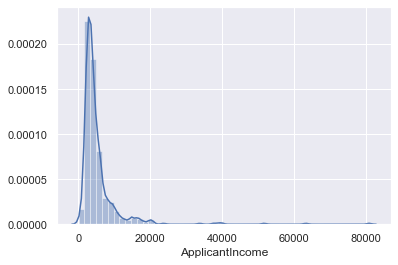

In [8]:
sns.distplot(df.ApplicantIncome)

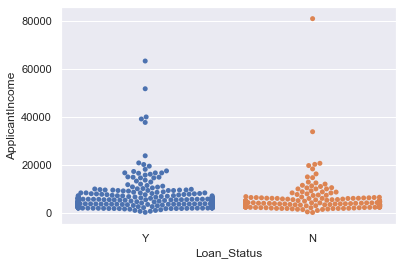

In [9]:
sns.swarmplot(data=df,x='Loan_Status',y='ApplicantIncome')

## CoApplicant Income

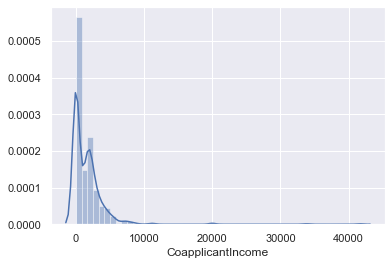

In [10]:
sns.distplot(df.CoapplicantIncome,bins=50)

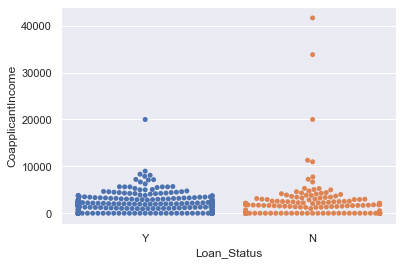

In [11]:
sns.swarmplot(data=df,x='Loan_Status',y='CoapplicantIncome')

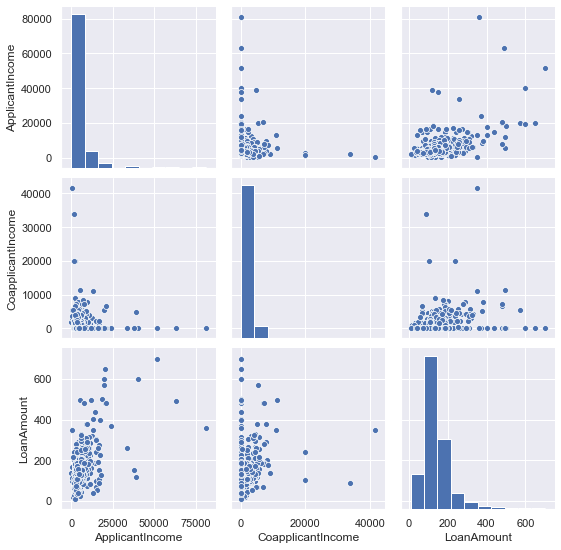

In [12]:
sns.pairplot(df.drop(['Credit_History','Loan_Amount_Term'],axis=1))

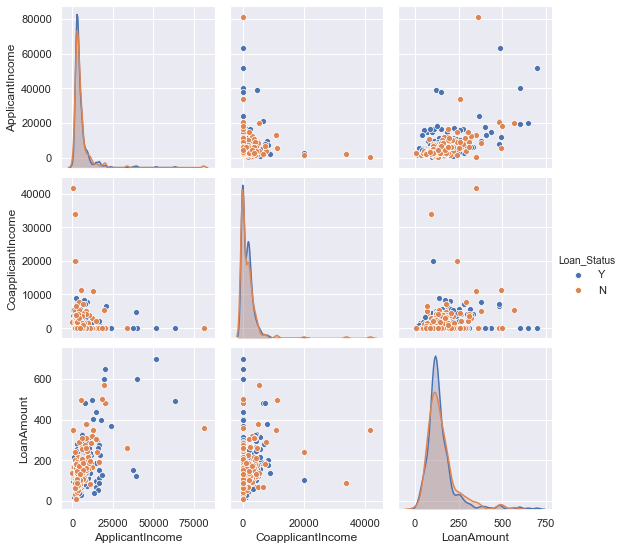

In [13]:
sns.pairplot(df.drop(['Credit_History','Loan_Amount_Term'],axis=1),hue='Loan_Status')

## Gender

In [14]:
df.groupby(['Gender','Loan_Status'])['Gender'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
Name: Gender, dtype: int64

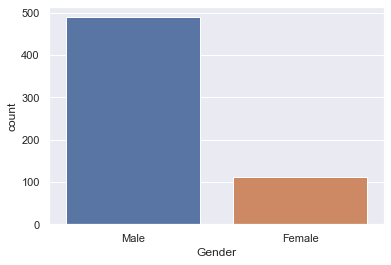

In [15]:
sns.countplot(df.Gender)

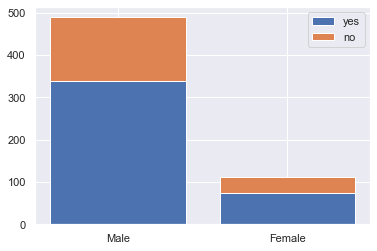

In [16]:
# stacked bar plot male and female with loan status 
yes=df['Gender'][df['Loan_Status']=='Y'].value_counts()
no=df['Gender'][df['Loan_Status']=='N'].value_counts()
plt.bar(yes.index,yess)
plt.bar(no.index,no,bottom=yes)
plt.legend(labels=['yes','no'])

Text(0.5, 1.0, 'Loan approval rate Vs Gender')

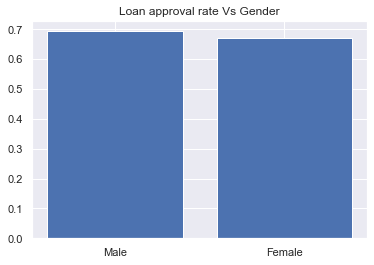

In [17]:
a=df['Gender'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()/df.Gender.value_counts().sort_index()
plt.bar(a.sort_values(ascending=False).index,a.sort_values(ascending=False))
plt.title('Loan approval rate Vs Gender')
# Male and Female roughly have the same percentage of loan being approved

## Married

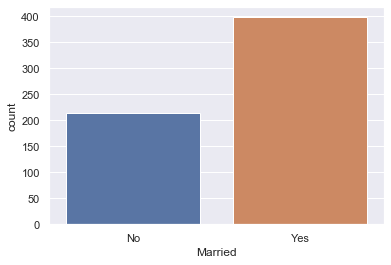

In [18]:
sns.countplot(df['Married'])

Text(0.5, 1.0, 'Married')

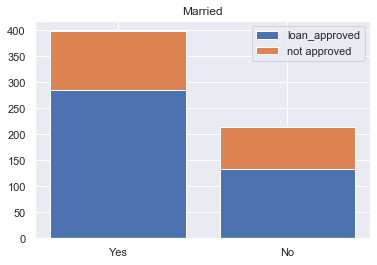

In [19]:
# stacked bar plot married and unmarried applicant with loan status
myes=df['Married'][df['Loan_Status']=='Y'].value_counts()
mno=df['Married'][df['Loan_Status']=='N'].value_counts()
plt.bar(myes.index,myes)
plt.bar(mno.index,mno,bottom=myes)
plt.legend(labels=['loan_approved','not approved'])
plt.title('Married')

Text(0.5, 1.0, 'Loan approval rate Vs Married')

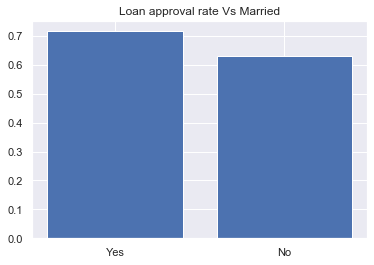

In [20]:
a=df['Married'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()/df.Married.value_counts().sort_index()
plt.bar(a.sort_values(ascending=False).index,a.sort_values(ascending=False))
plt.title('Loan approval rate Vs Married')
# married people have a higher chance of getting the loan approved

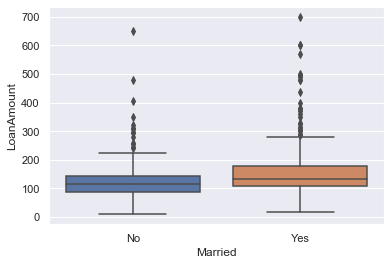

In [102]:
sns.boxplot('Married','LoanAmount',data=df)

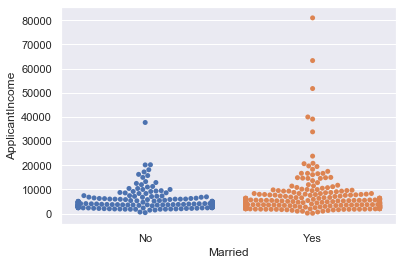

In [104]:
sns.swarmplot('Married','ApplicantIncome',data=df)

##  Education

Text(0.5, 1.0, 'Education')

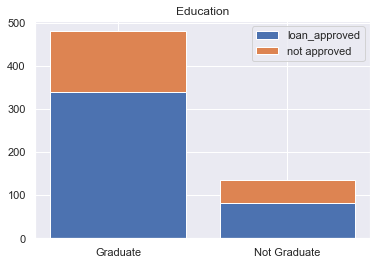

In [23]:
# stacked bar plot Graduate and non graduate applicant with loan status
myes=df['Education'][df['Loan_Status']=='Y'].value_counts()
mno=df['Education'][df['Loan_Status']=='N'].value_counts()
plt.bar(myes.index,myes)
plt.bar(mno.index,mno,bottom=myes)
plt.legend(labels=['loan_approved','not approved'])
plt.title('Education')

Text(0.5, 1.0, 'Loan approval rate Vs Education')

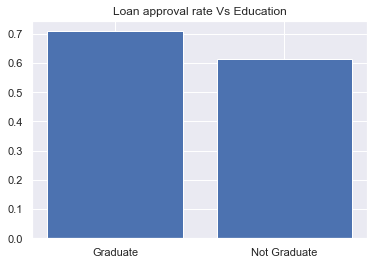

In [24]:
a=df['Education'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()/df.Education.value_counts().sort_index()
plt.bar(a.sort_values(ascending=False).index,a.sort_values(ascending=False))
plt.title('Loan approval rate Vs Education')
# Graduates have a higher chance of getting the loan approved

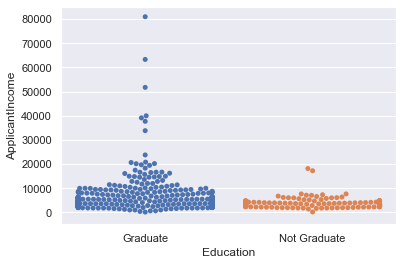

In [25]:
sns.swarmplot('Education','ApplicantIncome',data=df)

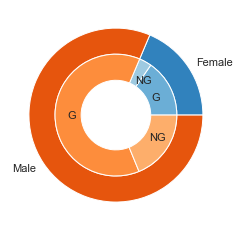

In [26]:
# Distribution of graduates and non-graduates among male and female
gend=pd.crosstab(df.Gender,df.Education)
cmap=plt.get_cmap('tab20c')
outer=cmap(np.array([0,4]))
inner=cmap(np.array([1,2,5,6]))
gend=pd.crosstab(df.Gender,df.Education)
plt.pie(gend.sum(axis=1),radius=1,wedgeprops=dict(width=0.3),colors=outer,labels=gend.index)
plt.pie(gend.values.flatten(),radius=0.7,wedgeprops=dict(width=0.3),colors=inner,labels=['G','NG','G','NG'],labeldistance=0.65)
plt.show()

## Property_area

Text(0.5, 1.0, 'Property_Area')

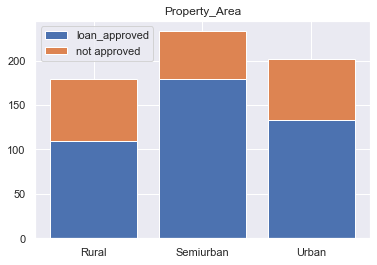

In [27]:
# stacked bar plot of property area distributed on loan status 
myes=df['Property_Area'][df['Loan_Status']=='Y'].value_counts().sort_index()
mno=df['Property_Area'][df['Loan_Status']=='N'].value_counts().sort_index()
plt.bar(myes.index,myes)
plt.bar(mno.index,mno,bottom=myes)
plt.legend(labels=['loan_approved','not approved'])
plt.title('Property_Area')

Text(0.5, 1.0, 'Loan approval rate Vs Property_Area')

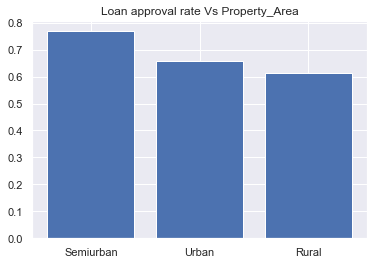

In [28]:
a=df['Property_Area'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()/df.Property_Area.value_counts().sort_index()
plt.bar(a.sort_values(ascending=False).index,a.sort_values(ascending=False))
plt.title('Loan approval rate Vs Property_Area')
# There is a higher probability of loan approval for those who belongs to semiurban area
# semiurban shows largest loan approval rates

In [29]:
#The percentage of loan approved gender wise in each property area
A=df.groupby(['Gender','Property_Area','Loan_Status']).count()/df.groupby(['Gender','Property_Area']).count()
A['Loan_ID']
# We can see that in semi-urban region both male and femal have much higher percentage of approval.

Gender  Property_Area  Loan_Status
Female  Rural          N              0.416667
                       Y              0.583333
        Semiurban      N              0.236364
                       Y              0.763636
        Urban          N              0.424242
                       Y              0.575758
Male    Rural          N              0.377483
                       Y              0.622517
        Semiurban      N              0.226744
                       Y              0.773256
        Urban          N              0.325301
                       Y              0.674699
Name: Loan_ID, dtype: float64

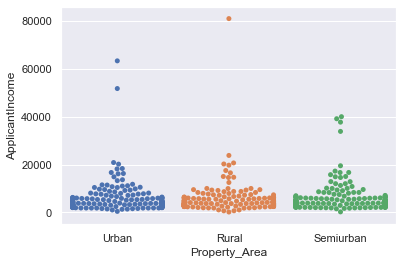

In [108]:
sns.swarmplot('Property_Area','ApplicantIncome',data=df)

## loan amount term

In [31]:
df.Loan_Amount_Term.value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

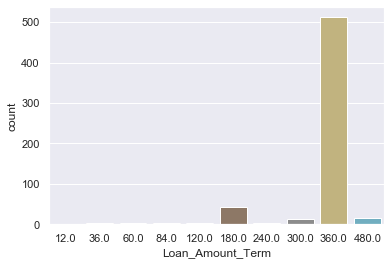

In [32]:
sns.countplot(df.Loan_Amount_Term)
# loan amount term is highly skewed data with majority of the loan term as 360 months.

In [33]:
df.groupby('Loan_Amount_Term').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Amount_Term,,,,
12.0,4625.000000,2857.000000,111.000000,NaN
36.0,3419.500000,0.000000,117.500000,1.000000
60.0,5032.500000,2850.500000,140.000000,1.000000
84.0,4128.500000,1093.500000,132.250000,1.000000
120.0,2792.666667,362.000000,22.333333,1.000000
180.0,6927.886364,2556.154545,147.523810,0.767442
240.0,5907.750000,0.000000,118.333333,1.000000
300.0,8184.923077,2280.384615,185.153846,0.700000
360.0,5298.083984,1562.258047,147.245436,0.859574


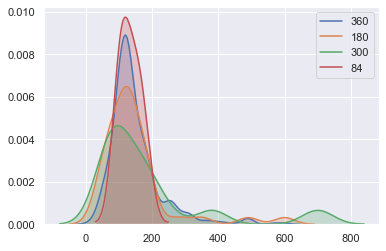

In [34]:
sns.kdeplot(df['LoanAmount'][df['Loan_Amount_Term']==360],shade=True)
sns.kdeplot(df['LoanAmount'][df['Loan_Amount_Term']==180],shade=True)
sns.kdeplot(df['LoanAmount'][df['Loan_Amount_Term']==300],shade=True)
sns.kdeplot(df['LoanAmount'][df['Loan_Amount_Term']==84],shade=True)
plt.legend(labels=['360','180','300','84'])
#there is no clear difference with distributiion of the loan amount and it can be divided into three classes
# long term , medium term and short term

## Dependents

Text(0.5, 1.0, 'Dependents')

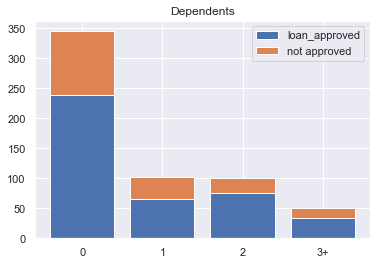

In [35]:
myes=df['Dependents'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()
mno=df['Dependents'][df['Loan_Status']=='N'].dropna().value_counts().sort_index()
plt.bar(myes.index,myes)
plt.bar(mno.index,mno,bottom=myes)
plt.legend(labels=['loan_approved','not approved'])
plt.title('Dependents')
# majority of the applicants have zero dependents, other classes have comparetivley much lower number.

Text(0.5, 1.0, 'Loan approval rate Vs Dependents')

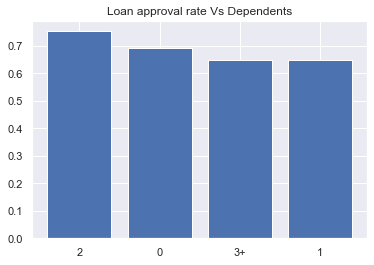

In [36]:
a=df['Dependents'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()/df.Dependents.value_counts()
plt.bar(a.sort_values(ascending=False).index,a.sort_values(ascending=False))
plt.title('Loan approval rate Vs Dependents')
# The percentage of loan approved is roughly the same for all applicant with diffrent number of dependents
# Applicants with 2 dependents shows slightly higher percentage of approval rate 

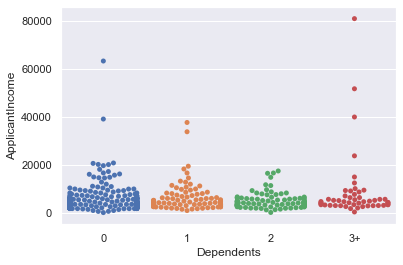

In [37]:
sns.swarmplot('Dependents','ApplicantIncome',data=df)

## self employed

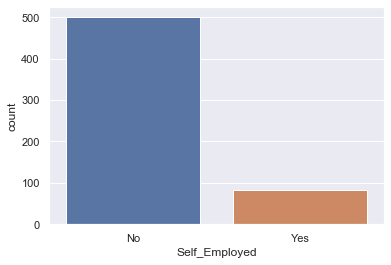

In [38]:
sns.countplot(df.Self_Employed)

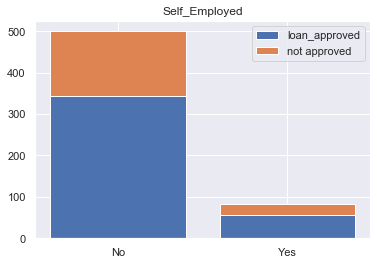

In [39]:
myes=df['Self_Employed'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()
mno=df['Self_Employed'][df['Loan_Status']=='N'].dropna().value_counts().sort_index()
plt.bar(myes.index,myes)
plt.bar(mno.index,mno,bottom=myes)
plt.legend(labels=['loan_approved','not approved'])
plt.title('Self_Employed')
plt.show()
# Majority of the people who apply for loan are not self employed ie. they have a regular source of income


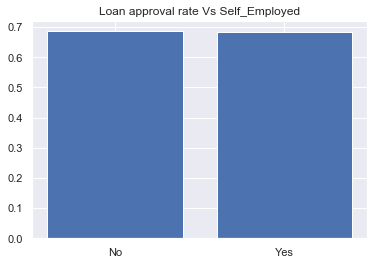

In [40]:
a=df['Self_Employed'][df['Loan_Status']=='Y'].dropna().value_counts()/df.Self_Employed.value_counts()
plt.bar(a.index,a)
plt.title('Loan approval rate Vs Self_Employed')
plt.show()
# Eventhough self employed is higher in number, the percentage of people who's loan is approved seems to be the same.

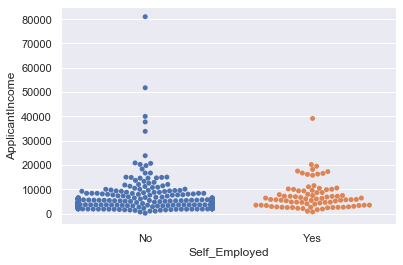

In [41]:
sns.swarmplot('Self_Employed','ApplicantIncome',data=df)

# credit history

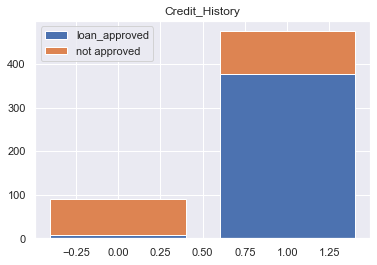

In [42]:
# credit history gives an idea about how the applicant had paid of credit previously
myes=df['Credit_History'][df['Loan_Status']=='Y'].dropna().value_counts().sort_index()
mno=df['Credit_History'][df['Loan_Status']=='N'].dropna().value_counts().sort_index()
plt.bar(myes.index,myes)
plt.bar(mno.index,mno,bottom=myes)
plt.legend(labels=['loan_approved','not approved'])
plt.title('Credit_History')
plt.show()
# It can be noticed that credit history have a direct relationship with the loan_status
# majority of the applicant with credit history 1 have their loan approved
# majority of the applicant with credit history 0 have their loan denied


Text(0.5, 1.0, 'credit_history Vs Income')

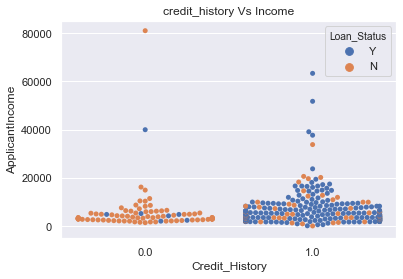

In [43]:
sns.swarmplot(x='Credit_History',y='ApplicantIncome',data=df,hue='Loan_Status')
plt.title('credit_history Vs Income')


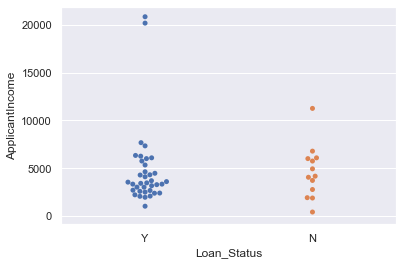

In [44]:
sns.swarmplot(x='Loan_Status',y='ApplicantIncome',data=df[df.Credit_History.isnull()])

# Creating a pipeline for data pre processing

In [45]:
# number of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
# function to divide the loan amount tern to three classes 
# long , medium and short term
def loan_term(a):
    if a>=300:
        return 'long_term'
    if (a>=120) & (a<300):
        return 'medium_term'
    if (a<120):
        return 'short_term'

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [123]:
# numerical_1 and categorical_1 are attributes present pre data processing
# numerical_2 and categorical_2 will be used to add new features and contains the column name post data processing
global numerical_1
numerical_1=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       ]
global categorical_1
categorical_1=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area','Loan_Amount_Term']
global column
column=numerical_1+categorical_1

column_2=column.copy()  
numerical_2=numerical_1.copy()
categorical_2=categorical_1.copy()

In [138]:
# pipeline has been divided into 3 components
# 1. imputer for categorical and numerical data to fill missing values
# 2. customized transformer for feature engineering 
# 3. standard scaler for numerical data and one hot encoder for categorical data
imputer=ColumnTransformer([
    ('num',SimpleImputer(strategy='mean'),numerical_1),
    ('cat',SimpleImputer(strategy='most_frequent'),categorical_1)
])
# customizd transformer for feature engineering and cleaning data
class feature_eng(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        global column_2
        global numerical_2
        global categorical_2
        column_2=column.copy()
        numerical_2=numerical_1.copy()
        categorical_2=categorical_1.copy()
        x=pd.DataFrame(X,columns=column_2)
        # creating a new attribute total income ie. sum of applicant and co applicant income.
        total_income=x['ApplicantIncome']+x['CoapplicantIncome']
        x.insert(len(numerical_2),'total_income',total_income)
        numerical_2.append('total_income')
        # Debt per income gives us an understanding of the financial pressure on the applicant 
        debt_per_income=x['LoanAmount']/x['total_income']
        x.insert(len(numerical_2),'debt_per_income',debt_per_income)
        numerical_2.append('debt_per_income')
        
        x['Loan_Amount_Term']=x['Loan_Amount_Term'].apply(loan_term)
        x['Married']=x['Married'].apply(lambda x:'Married' if x=='Yes' else 'not_married')
        x['Self_Employed']=x['Self_Employed'].apply(lambda x:'Self_Employed' if x=='Yes' else 'Not_Self_Employed')
        
        column_2=numerical_2+categorical_2

        
        return x
      
encoder=ColumnTransformer([
    ('num',StandardScaler(),numerical_2),
    ('cat',OneHotEncoder(),categorical_2)
])    


In [139]:
# final pipeline
pre_processing=Pipeline([
    ('imputer',imputer),
    ('feature_eng',feature_eng()),
    ('encoder',encoder)
])

In [140]:
def preprocessing(df,target=True):
    # function that passes the dataframe through a pipeline and returns the final clean data and column names
    X=pre_processing.fit_transform(df)
    cat_encoded=pre_processing.named_steps['encoder'].named_transformers_['cat']
    cat_one_hot=[j for i in cat_encoded.categories_ for j in i ]
    column_post_processing=numerical_2+cat_one_hot

    if target:
        # when the target variable is present in the data frame passed to the function
        y=df.Loan_Status.apply(lambda x : 1 if x=='Y' else 0).values
        return X ,y ,column_post_processing
    else:
        return X ,column_post_processing

# Train test split

In [141]:
train=pd.read_csv('train_ctrUa4K.csv')

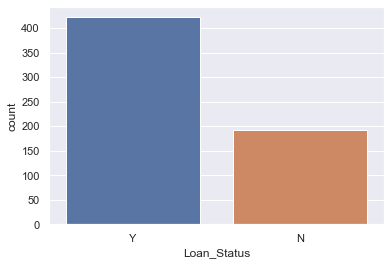

In [142]:
sns.countplot(x='Loan_Status',data=df)
#As the number of positive cases are much higher than the negative cases
# we need to make sure that both train and test case has equal propotion of both classes.
#This can be achieved by doing a strattified shuffle split

In [143]:
from sklearn.model_selection import StratifiedShuffleSplit

In [144]:
X,y,columns_post=preprocessing(train)


In [148]:
len(columns_post)

25

In [147]:
X.shape

(614, 25)

In [149]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3)

In [150]:
split.split(X,y)

<generator object BaseShuffleSplit.split at 0x0000011703E1E148>

In [151]:
for train_index,test_index in split.split(X,y):
    train_x=X[train_index]
    train_y=y[train_index]
    test_x=X[test_index]
    test_y=y[test_index]

# Model training

In [168]:
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score


In [155]:
def scoring(model,x,y):
    # function that output the cross val score for a model
    print(np.mean(cross_val_score(model,x,y,scoring='f1',cv=3)))

In [156]:
def matrix(model,x,y):
    # takes model and x,y as input and output confustion matric and classification report
    pred=cross_val_predict(model,x,y,cv=3)
    print(confusion_matrix(y,pred))
    print(classification_report(y,pred))

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr1=LogisticRegression()

In [87]:
matrix(lr1,train_x,train_y)

[[ 58  76]
 [  8 287]]
              precision    recall  f1-score   support

           0       0.88      0.43      0.58       134
           1       0.79      0.97      0.87       295

    accuracy                           0.80       429
   macro avg       0.83      0.70      0.73       429
weighted avg       0.82      0.80      0.78       429



In [88]:
scoring(lr1,train_x,train_y)

0.7553200527226501


### Training SVC 

In [157]:
sv=SVC(kernel='linear')
matrix(sv,train_x,train_y)

[[ 60  74]
 [  7 288]]
              precision    recall  f1-score   support

           0       0.90      0.45      0.60       134
           1       0.80      0.98      0.88       295

    accuracy                           0.81       429
   macro avg       0.85      0.71      0.74       429
weighted avg       0.83      0.81      0.79       429



In [158]:
scoring(sv,train_x,train_y)

0.8772229823900387


In [159]:
sv2=SVC(kernel='rbf',)

In [160]:
matrix(sv2,train_x,train_y)

[[ 60  74]
 [  9 286]]
              precision    recall  f1-score   support

           0       0.87      0.45      0.59       134
           1       0.79      0.97      0.87       295

    accuracy                           0.81       429
   macro avg       0.83      0.71      0.73       429
weighted avg       0.82      0.81      0.79       429



In [161]:
scoring(sv2,train_x,train_y)

0.874014784014784


In [162]:
# Param grid with different c and gamma values with a gaussian kernel
param_grid={
    'C':[0.001,0.01,0.1,1,5,10,15],
    'gamma':[0.001,0.01,0.1,1,3,5,9],
    'kernel':['rbf']
}

In [163]:
sv=SVC()
sv_grid_g=GridSearchCV(sv,param_grid=param_grid,scoring='f1')

In [164]:
sv_grid_g.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15],
                         'gamma': [0.001, 0.01, 0.1, 1, 3, 5, 9],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [165]:
result_gamma=sv_grid_g.cv_results_

In [166]:
for i, j in zip(result_gamma['mean_test_score'],result_gamma['params']):
    print(i,j)

0.8149233716475097 {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.001, 'gamma': 3, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.001, 'gamma': 5, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.001, 'gamma': 9, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 3, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 5, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.01, 'gamma': 9, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.8149233716475097 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.81492337

In [167]:
# The precision and recall values have improved with the gridsearch
print(confusion_matrix(test_y,sv_grid_g.predict(test_x)),classification_report(test_y,sv_grid_g.predict(test_x)))

[[ 22  36]
 [  3 124]]               precision    recall  f1-score   support

           0       0.88      0.38      0.53        58
           1       0.78      0.98      0.86       127

    accuracy                           0.79       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.79      0.76       185



### Accuracy score for svm with rbf kernel

In [73]:
# Accuracy score test set
accuracy_score(test_y,sv_grid_g.predict(test_x))

0.8162162162162162

In [74]:
# Accuracy score with training set
accuracy_score(train_y,sv_grid_g.predict(train_x))

0.8111888111888111

In [170]:
#F1score - testing data
f1_score(test_y,sv_grid_g.predict(test_x))

0.8641114982578397

In [171]:
#F1score - training data
f1_score(train_y,sv_grid_g.predict(train_x))

0.8831562974203339

In [172]:
# parameter for grid search on SVC with no kernel
param_grid_linear={
    'C':[0.001,0.01,0.1,1,5,10,15],
    'gamma':[0.001,0.01,0.1,1,3,5],
    'kernel':['linear']
}

In [173]:
sv=SVC()
sv_grid_linear=GridSearchCV(sv,param_grid=param_grid_linear,scoring='f1')

In [174]:
sv_grid_linear.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15],
                         'gamma': [0.001, 0.01, 0.1, 1, 3, 5],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [175]:
result_linear=sv_grid_linear.cv_results_
for i, j in zip(result_linear['mean_test_score'],result_linear['params']):
    print(i,j)

0.8149233716475097 {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.8149233716475097 {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
0.8149233716475097 {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}
0.8149233716475097 {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
0.8149233716475097 {'C': 0.001, 'gamma': 3, 'kernel': 'linear'}
0.8149233716475097 {'C': 0.001, 'gamma': 5, 'kernel': 'linear'}
0.82028069298684 {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.82028069298684 {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
0.82028069298684 {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.82028069298684 {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
0.82028069298684 {'C': 0.01, 'gamma': 3, 'kernel': 'linear'}
0.82028069298684 {'C': 0.01, 'gamma': 5, 'kernel': 'linear'}
0.882375426183508 {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
0.882375426183508 {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.882375426183508 {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.882375426183508 {'C': 0.1, 'gamma': 1,

### Accuracy score for svm with no kernel

In [176]:
# accuracy score with training set
accuracy_score(train_y,sv_grid_linear.predict(train_x))

0.8181818181818182

In [177]:
# accuracy score with test set
accuracy_score(test_y,sv_grid_linear.predict(test_x))

0.7891891891891892

In [179]:
#F1score - testing data
f1_score(test_y,sv_grid_linear.predict(test_x))

0.8641114982578397

In [180]:
#F1score - training data
f1_score(train_y,sv_grid_linear.predict(train_x))

0.8818181818181817

In [178]:
# Shows the weight for each coefficients
for i in zip(columns_post,sv_grid_linear.best_estimator_.coef_.flatten()):
    print(i)

('ApplicantIncome', -7.400763133380561e-05)
('CoapplicantIncome', -0.00011259837164118158)
('LoanAmount', 0.0002972918818925224)
('total_income', -0.00012101674910303117)
('debt_per_income', -0.00019033922214872767)
('Female', -2.1111442446208883e-05)
('Male', 2.1111442445764794e-05)
('Married', 8.428300662810528e-05)
('not_married', -8.42830066272171e-05)
('0', 7.039230613425929e-05)
('1', -7.583701798319353e-06)
('2', 2.2668771902378815e-05)
('3+', -8.547737623920693e-05)
('Graduate', -2.4399300850852512e-05)
('Not Graduate', 2.43993008492982e-05)
('Not_Self_Employed', -1.3649535568482918e-05)
('Self_Employed', 1.3649535568927007e-05)
(0.0, -1.0000914302675339)
(1.0, 1.000091430267533)
('Rural', -5.3626831595376956e-05)
('Semiurban', 3.7511099650000546e-05)
('Urban', 1.6115731947152767e-05)
('long_term', 0.00013685647422523317)
('medium_term', 0.000188847420938415)
('short_term', -0.00032570389516647924)


In [82]:
def to_csv(filename,model):
    # a function that predicts the test set provided and cave it in csv file 
    tes=pd.read_csv('test_lAUu6dG.csv')
    x,column=preprocessing(tes,target=False)
    new=tes[['Loan_ID']]
    new['Loan_Status']=model.predict(x)
    new.Loan_Status=new.Loan_Status.apply(lambda x : 'Y' if x==1 else 'N')
    new.to_csv(filename,index=False)

In [83]:
to_csv('sv1.csv',sv_grid_g)

C:\Users\GP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
to_csv('sv_linear.csv',sv_grid_linear)

C:\Users\GP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Descision tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [182]:
dt=DecisionTreeClassifier()

In [183]:
matrix(dt,train_x,train_y)

[[ 74  60]
 [ 69 226]]
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       134
           1       0.79      0.77      0.78       295

    accuracy                           0.70       429
   macro avg       0.65      0.66      0.66       429
weighted avg       0.71      0.70      0.70       429



In [184]:
train_x.shape

(429, 25)

In [185]:
scoring(dt,train_x,train_y)

0.774556822832685


In [186]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
imp=pd.DataFrame(columns_post,columns=['name'])

In [188]:
imp['dtree']=dt.feature_importances_

In [189]:
imp.set_index('name',inplace=True)

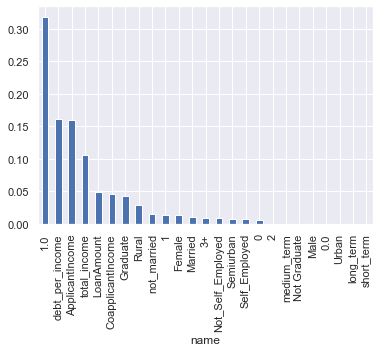

In [190]:
imp.dtree.sort_values(ascending=False).plot(kind='bar')

In [191]:
# param grid to train a decision tree with different depth 
param_grid={
    'max_depth':[2,6,10,12,18,26,30,36]
}

In [193]:
dt_grid=GridSearchCV(dt,param_grid=param_grid,scoring='f1',cv=3)

In [194]:
dt_grid.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 6, 10, 12, 18, 26, 30, 36]},
       

In [195]:
result=dt_grid.cv_results_

In [196]:
for i, j in zip(result['mean_test_score'],result['params']):
    print(i,j)

0.8787194473148267 {'max_depth': 2}
0.8311049923264422 {'max_depth': 6}
0.7945921296985127 {'max_depth': 10}
0.7818878148215699 {'max_depth': 12}
0.7635092841423088 {'max_depth': 18}
0.7780590452018812 {'max_depth': 26}
0.77469009336808 {'max_depth': 30}
0.7712870094274269 {'max_depth': 36}


In [197]:
imp['dtree_max_depth']=dt_grid.best_estimator_.feature_importances_

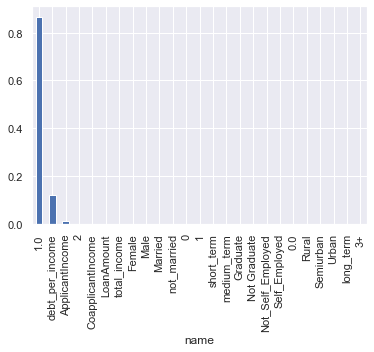

In [198]:
imp.dtree_max_depth.sort_values(ascending=False).plot(kind='bar')
# As only 5-6 features have comparetivley higher feature importance lets try to use PCA to reduce the dimension

In [200]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=5)



In [201]:
dt=DecisionTreeClassifier()
decision_pipe=Pipeline([
    ('pca',pca),
    ('dtree',dt)
])

In [205]:
param_grid_desc2={
    'pca__n_components':[2,4,6,10,12,14],
    'dtree__max_depth':[2,4,6,8,10,12,18,26,30],
    'dtree__min_samples_split':[2,4,6,10],
    'dtree__criterion':['gini','entropy'],
    'dtree__min_samples_leaf':[1,2,3,4,5]
}

In [206]:
grid_dim_desc=GridSearchCV(decision_pipe,param_grid=param_grid_desc2,cv=3,scoring='f1')

In [207]:
grid_dim_desc.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=5, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dtree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                

In [208]:
# the best estimator consists of 12 components after pca
grid_dim_desc.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=2,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [209]:
result_dimen=grid_dim_desc.cv_results_
for i, j in zip(result_dimen['mean_test_score'],result_dimen['params']):
    print(i,j)

0.7887779214386198 {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2, 'pca__n_components': 2}
0.7725339809400461 {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2, 'pca__n_components': 4}
0.7666181205930162 {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2, 'pca__n_components': 6}
0.7923308613837249 {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2, 'pca__n_components': 10}
0.8478955169483803 {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2, 'pca__n_components': 12}
0.8496150936679571 {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2, 'pca__n_components': 14}
0.7887779214386198 {'dtree__criterion': 'gini', 'dtree__max_d

0.6739890601570678 {'dtree__criterion': 'gini', 'dtree__max_depth': 30, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 6, 'pca__n_components': 4}
0.7459200354659057 {'dtree__criterion': 'gini', 'dtree__max_depth': 30, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 6, 'pca__n_components': 6}
0.7810928084761758 {'dtree__criterion': 'gini', 'dtree__max_depth': 30, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 6, 'pca__n_components': 10}
0.7755808694482648 {'dtree__criterion': 'gini', 'dtree__max_depth': 30, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 6, 'pca__n_components': 12}
0.7762513960808203 {'dtree__criterion': 'gini', 'dtree__max_depth': 30, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 6, 'pca__n_components': 14}
0.6984269711465113 {'dtree__criterion': 'gini', 'dtree__max_depth': 30, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 10, 'pca__n_components': 2}
0.6564594233990991 {'dtree__criterion': 'gini', 'dtree

0.7556062052540332 {'dtree__criterion': 'entropy', 'dtree__max_depth': 26, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 2, 'pca__n_components': 14}
0.6856548850867705 {'dtree__criterion': 'entropy', 'dtree__max_depth': 26, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 4, 'pca__n_components': 2}
0.6728569229979993 {'dtree__criterion': 'entropy', 'dtree__max_depth': 26, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 4, 'pca__n_components': 4}
0.738555063778239 {'dtree__criterion': 'entropy', 'dtree__max_depth': 26, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 4, 'pca__n_components': 6}
0.7469964758707667 {'dtree__criterion': 'entropy', 'dtree__max_depth': 26, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 4, 'pca__n_components': 10}
0.7396870554765291 {'dtree__criterion': 'entropy', 'dtree__max_depth': 26, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 4, 'pca__n_components': 12}
0.7461172687465791 {'dtree__criterion'

In [210]:
print(confusion_matrix(train_y,grid_dim_desc.predict(train_x)),classification_report(train_y,grid_dim_desc.predict(train_x)),accuracy_score(train_y,grid_dim_desc.predict(train_x)))

[[ 53  81]
 [  3 292]]               precision    recall  f1-score   support

           0       0.95      0.40      0.56       134
           1       0.78      0.99      0.87       295

    accuracy                           0.80       429
   macro avg       0.86      0.69      0.72       429
weighted avg       0.83      0.80      0.78       429
 0.8041958041958042


In [211]:
print(confusion_matrix(test_y,grid_dim_desc.predict(test_x)),classification_report(test_y,grid_dim_desc.predict(test_x)),accuracy_score(test_y,grid_dim_desc.predict(test_x)))

[[ 20  38]
 [  2 125]]               precision    recall  f1-score   support

           0       0.91      0.34      0.50        58
           1       0.77      0.98      0.86       127

    accuracy                           0.78       185
   macro avg       0.84      0.66      0.68       185
weighted avg       0.81      0.78      0.75       185
 0.7837837837837838


In [212]:
import joblib
joblib.dump(grid_dim_desc,'decision_tree_trained')
import joblib
model=joblib.load('decision_tree_trained')

## accuracy score for training set

In [213]:
print(accuracy_score(train_y,model.predict(train_x)))

0.8041958041958042


## accuracy score for test set

In [214]:
print(accuracy_score(test_y,model.predict(test_x)))

0.7837837837837838


In [215]:
to_csv('decision_tree.csv',grid_dim_desc)

C:\Users\GP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Random forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
rfc=RandomForestClassifier()

In [218]:
matrix(rfc,train_x,train_y)

[[ 68  66]
 [ 31 264]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.58       134
           1       0.80      0.89      0.84       295

    accuracy                           0.77       429
   macro avg       0.74      0.70      0.71       429
weighted avg       0.76      0.77      0.76       429



In [219]:
scoring(rfc,train_x,train_y)

0.8547902766590436


In [220]:
rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
imp['rfc']=rfc.feature_importances_

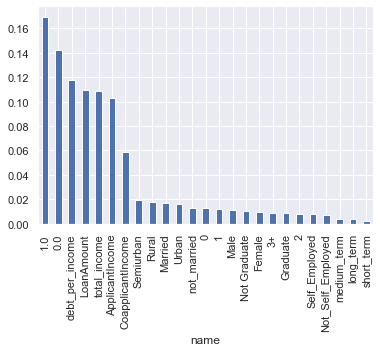

In [222]:
imp['rfc'].sort_values(ascending=False).plot(kind='bar')

In [223]:
rfc=RandomForestClassifier()


In [224]:
param_grid_rfc={
    'max_depth':[2,4,6],
    'n_estimators':[500],
    'criterion':['gini','entropy'],
    
}

In [225]:
grid_rfc=GridSearchCV(rfc,param_grid=param_grid_rfc,scoring='f1',cv=3)

In [226]:
grid_rfc.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [227]:
grid_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [228]:
result_rfc=grid_rfc.cv_results_
for i, j in zip(result_rfc['mean_test_score'],result_rfc['params']):
    print(i,j)

0.8823758939945633 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 500}
0.8835490552866183 {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 500}
0.8770938945057919 {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 500}
0.8823758939945633 {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 500}
0.8821046860697374 {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 500}
0.8822274658156521 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 500}


In [229]:
param_grid_rfc_2={
    
    'n_estimators':[500,300,200],

}

In [230]:
rfc=RandomForestClassifier(max_depth=2)
grid_rfc2=GridSearchCV(rfc,param_grid=param_grid_rfc_2,scoring='f1',cv=3)
grid_rfc2.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [231]:
result_rfc=grid_rfc2.cv_results_
for i, j in zip(result_rfc['mean_test_score'],result_rfc['params']):
    print(i,j)

0.8823758939945633 {'n_estimators': 500}
0.8823758939945633 {'n_estimators': 300}
0.8823758939945633 {'n_estimators': 200}


## accuracy score for training set

In [232]:
print(accuracy_score(train_y,grid_rfc2.predict(train_x)))

0.8181818181818182


## accuracy score for training set

In [233]:
print(accuracy_score(test_y,grid_rfc2.predict(test_x)))

0.7891891891891892


In [234]:
to_csv('random_forest.csv',grid_rfc)

C:\Users\GP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Ensemble voting classifier (svm,logistic regression, decision tree)

In [235]:
from sklearn.ensemble import VotingClassifier

In [236]:
log=LogisticRegression()
svm=SVC(gamma=0.01)
des=DecisionTreeClassifier(criterion='entropy',max_depth=2)
vot_clf=VotingClassifier(estimators=[('log',log),('svm',svm),('desc',des)])

In [237]:
vot_clf.fit(train_x,train_y)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                          

In [238]:
print(accuracy_score(test_y,vot_clf.predict(test_x)))

0.7945945945945946


In [239]:
# bagging with logisticregression, decison tree, svc with PCA
log=LogisticRegression()
svm=SVC(gamma=0.01)
des=DecisionTreeClassifier(criterion='entropy',max_depth=2)
pca=PCA(n_components=12)
des_pipe=Pipeline([
    ('pca',pca),
    ('dtree',des)
])

vot_clf_2=VotingClassifier(estimators=[('log',log),('svm',svm),('desc',des_pipe)])

In [240]:
vot_clf_2.fit(train_x,train_y)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,...
                                               DecisionTreeClassifier(ccp_alpha=0.0,
                         

In [241]:
print(accuracy_score(test_y,vot_clf_2.predict(test_x)))

0.8


In [242]:
log=LogisticRegression()
svm=SVC(gamma=0.01,probability=True)
des=DecisionTreeClassifier(criterion='entropy',max_depth=2)
rft=RandomForestClassifier()
vot_clf_3=VotingClassifier(estimators=[('log',log),('svm',svm),('desc',des),('rft',rft)],voting='soft')

In [243]:
vot_clf_3.fit(train_x,train_y)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,...
                                                     criterion='gini',
                                       

In [244]:
print(accuracy_score(test_y,vot_clf_3.predict(test_x)))

0.8


In [245]:
print(accuracy_score(train_y,vot_clf_3.predict(train_x)),'\n',classification_report(train_y,vot_clf_3.predict(train_x)))

0.8391608391608392 
               precision    recall  f1-score   support

           0       0.93      0.52      0.67       134
           1       0.82      0.98      0.89       295

    accuracy                           0.84       429
   macro avg       0.88      0.75      0.78       429
weighted avg       0.85      0.84      0.82       429



In [246]:
to_csv('voting.csv',vot_clf_3)

C:\Users\GP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Ensemble Bagging

In [247]:
from sklearn.ensemble import BaggingClassifier

### Bagging with SVM

In [254]:
sv1=SVC()
bag4=BaggingClassifier(SVC(),n_estimators=500,max_samples=100,n_jobs=-1)

In [255]:
bag4.fit(train_x,train_y)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [256]:
accuracy_score(train_y,bag4.predict(train_x))

0.8158508158508159

In [257]:
accuracy_score(test_y,bag4.predict(test_x))

0.8